### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:
df = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

In [ ]:
facturacion_total = df['Precio'].sum()
print(f"La facturación total es de ${facturacion_total}")

La facturación total es de $4403619200.0


In [ ]:
facturacion_promedio_tienda = df.groupby('Lugar de Compra')['Precio'].sum().mean()
print(f"La facturación promedio por tienda es de ${facturacion_promedio_tienda}")

La facturación promedio por tienda es de $231769431.57894737


In [ ]:
facturacion_por_categoria = df.groupby('Categoría del Producto')['Precio'].sum()
print("La facturación por categoría es:")
print(facturacion_por_categoria)

La facturación por categoría es:
Categoría del Producto
Artículos para el hogar    5.757980e+07
Deportes y diversión       1.429777e+08
Electrodomésticos          1.324751e+09
Electrónicos               1.660576e+09
Instrumentos musicales     3.487726e+08
Juguetes                   7.360440e+07
Libros                     3.769610e+07
Muebles                    7.576610e+08
Name: Precio, dtype: float64


In [ ]:
print(df.columns)

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')


In [ ]:
import matplotlib.pyplot as plt

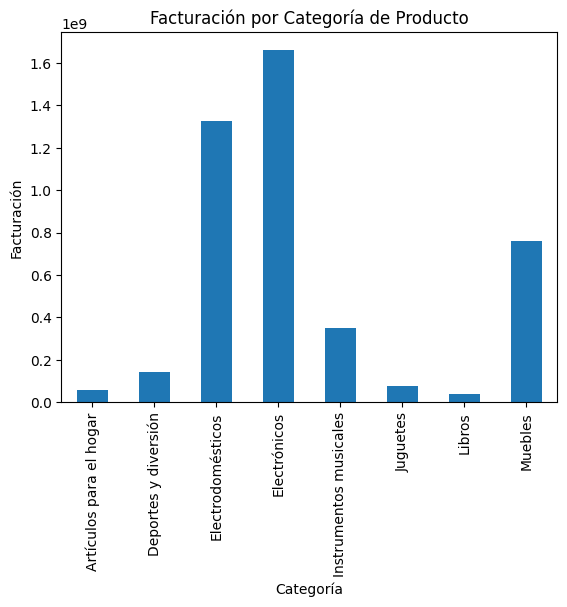

In [ ]:
facturacion_por_categoria.plot(kind='bar')
plt.title('Facturación por Categoría de Producto')
plt.xlabel('Categoría')
plt.ylabel('Facturación')
plt.show()

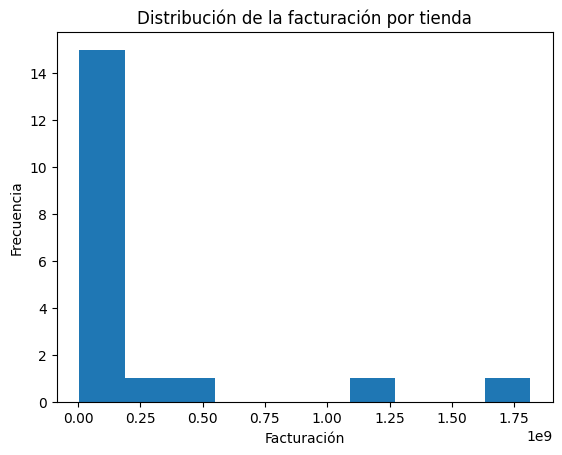

In [ ]:
df.groupby('Lugar de Compra')['Precio'].sum().plot(kind='hist')
plt.title('Distribución de la facturación por tienda')
plt.xlabel('Facturación')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
df.to_csv('facturacion.csv', index=False)

# 2. Ventas por categoría

In [ ]:
ventas_por_categoria = df.groupby('Categoría del Producto')['Precio'].sum().reset_index()
ventas_por_categoria = ventas_por_categoria.sort_values(by='Precio', ascending=False)
print(ventas_por_categoria)

    Categoría del Producto        Precio
3             Electrónicos  1.660576e+09
2        Electrodomésticos  1.324751e+09
7                  Muebles  7.576610e+08
4   Instrumentos musicales  3.487726e+08
1     Deportes y diversión  1.429777e+08
5                 Juguetes  7.360440e+07
0  Artículos para el hogar  5.757980e+07
6                   Libros  3.769610e+07


# 3. Calificación promedio de la tienda


In [ ]:
promedio_tienda1 = tienda['Calificación'].mean()
promedio_tienda2 = tienda2['Calificación'].mean()
promedio_tienda3 = tienda3['Calificación'].mean()
promedio_tienda4 = tienda4['Calificación'].mean()
print(f"Calificación promedio Tienda 1: {promedio_tienda1:.2f}")
print(f"Calificación promedio Tienda 2: {promedio_tienda2:.2f}")
print(f"Calificación promedio Tienda 3: {promedio_tienda3:.2f}")
print(f"Calificación promedio Tienda 4: {promedio_tienda4:.2f}")

Calificación promedio Tienda 1: 3.98
Calificación promedio Tienda 2: 4.04
Calificación promedio Tienda 3: 4.05
Calificación promedio Tienda 4: 4.00


# 4. Productos más y menos vendidos

In [ ]:
tiendas = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

In [ ]:
ventas_por_producto = tiendas['Producto'].value_counts().reset_index()
ventas_por_producto.columns = ['Producto', 'Cantidad Vendida']
producto_mas_vendido = ventas_por_producto.iloc[0]
producto_menos_vendido = ventas_por_producto[ventas_por_producto['Cantidad Vendida'] == ventas_por_producto['Cantidad Vendida'].min()]
print("Producto más vendido:")
print(producto_mas_vendido)

print("\nProductos menos vendidos:")
print(producto_menos_vendido)

Producto más vendido:
Producto            Mesa de noche
Cantidad Vendida              210
Name: 0, dtype: object

Productos menos vendidos:
        Producto  Cantidad Vendida
50  Celular ABXY               157


# 5. Envío promedio por tienda

In [ ]:
envio_prom_tienda1 = tienda['Costo de envío'].mean()
envio_prom_tienda2 = tienda2['Costo de envío'].mean()
envio_prom_tienda3 = tienda3['Costo de envío'].mean()
envio_prom_tienda4 = tienda4['Costo de envío'].mean()
print(f"Envío promedio Tienda 1: ${envio_prom_tienda1:.2f}")
print(f"Envío promedio Tienda 2: ${envio_prom_tienda2:.2f}")
print(f"Envío promedio Tienda 3: ${envio_prom_tienda3:.2f}")
print(f"Envío promedio Tienda 4: ${envio_prom_tienda4:.2f}")

Envío promedio Tienda 1: $26018.61
Envío promedio Tienda 2: $25216.24
Envío promedio Tienda 3: $24805.68
Envío promedio Tienda 4: $23459.46


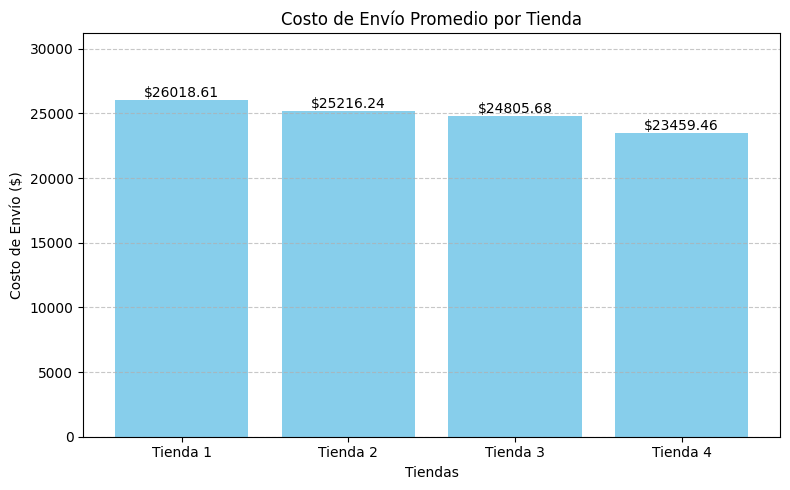

In [ ]:
import matplotlib.pyplot as plt
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
envios_promedio = [envio_prom_tienda1, envio_prom_tienda2, envio_prom_tienda3, envio_prom_tienda4]

plt.figure(figsize=(8, 5))
plt.bar(tiendas, envios_promedio, color='skyblue')
plt.title('Costo de Envío Promedio por Tienda')
plt.ylabel('Costo de Envío ($)')
plt.xlabel('Tiendas')
plt.ylim(0, max(envios_promedio)*1.2)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, valor in enumerate(envios_promedio):
    plt.text(i, valor + 0.1, f"${valor:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()